## Title:            Midterm Assignment 1



Author:               Benjamin von Chamier Gliszezynski

M-Nr.:                753562

Submission until:     Friday, 14 January 2022, 12:00 AM


## 1 Overview

This project is designed to train the students into using computational tools to apply the knowledge gained in the course. It is split into two parts:
1. Power flow modeling and analysis.
2. Short circuit analysis.

## 2 Power flow modelling and analysis
**2.1 System parameters**

- External Grid: Maximum short-circuit power 100 MVA, minimum short-circuit capacity 80 MVA, maximum R/X ratio 0.35, and minimum short-circuit ratio is 0.20
-  T1: standard type1 transformer 25 MVA 110/20 kV
-  T2, T3, T4: standard type transformer 0.4 MVA 20/0.4 kV
-  Line B2-B3: standard type line NA2XS2Y 1x95 RM/25 12/20 kV, 5 km length
-  Line B2-B4: standard type line NA2XS2Y 1x95 RM/25 12/20 kV, 6 km length
-  Line B2-B5: standard type line NA2XS2Y 1x95 RM/25 12/20 kV, 7 km length
-  Line B2-B6: standard type line NA2XS2Y 1x95 RM/25 12/20 kV, 6 km length
-  Motor M3: 10 MVA rated motor, operated at 3 MW active and 1 MVAr reactive power consumption. Ratio of nominal current to short circuit current is 1.2 and R/X ratio is 7. You can use the sgen model with type “motor”.
-  LV lines: All low-voltage lines are standard type line 48-AL1/8-ST1A 0.4 with 100m length.
-  LV loads: All low-voltage loads (households) have a consumption of 2.2 kW at a power factor 0.95 inductive.

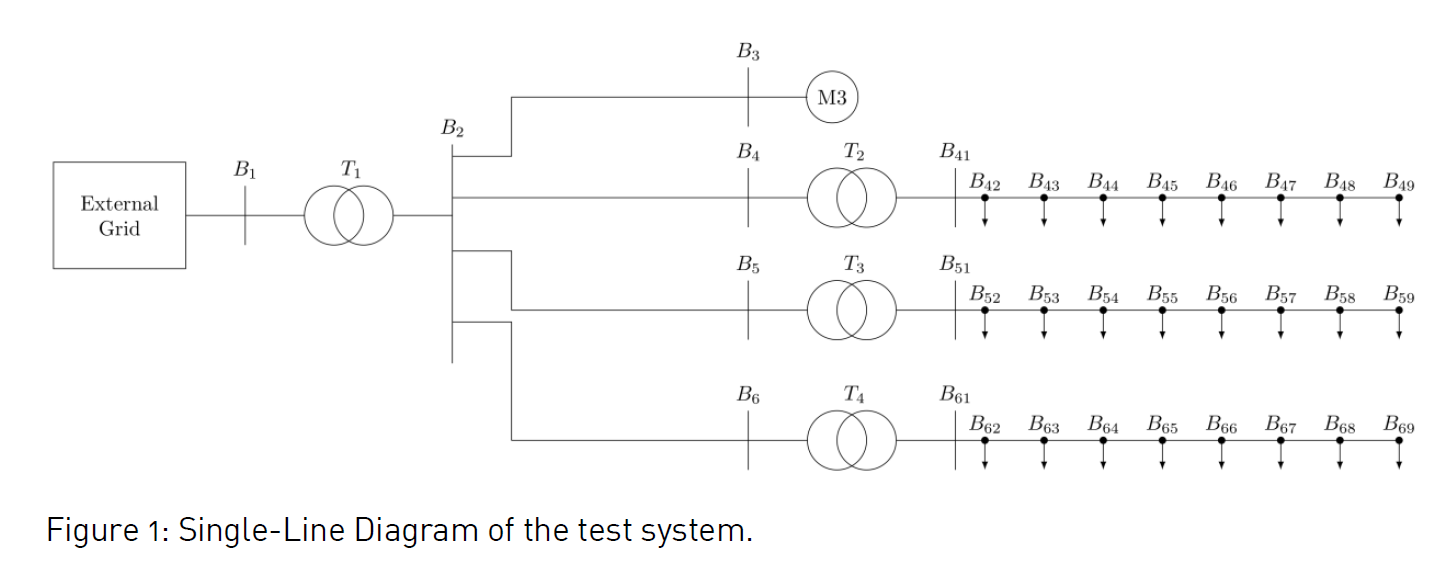

In [170]:
import pandapower as pp
#create empty net
net = pp.create_empty_network() 

In [171]:
#create buses voltage levels 110/20/0.4kV
b1 = pp.create_bus(net, vn_kv=110, name="Bus 1")
b2 = pp.create_bus(net, vn_kv=20, name="Bus 2")
b3 = pp.create_bus(net, vn_kv=20, name="Bus 3")
b4 = pp.create_bus(net, vn_kv=20, name="Bus 4")
b5 = pp.create_bus(net, vn_kv=20, name="Bus 5")
b6 = pp.create_bus(net, vn_kv=20, name="Bus 6")

b41 = pp.create_bus(net, vn_kv=0.4, name="Bus 41")
b42 = pp.create_bus(net, vn_kv=0.4, name="Bus 42")
b43 = pp.create_bus(net, vn_kv=0.4, name="Bus 43")
b44 = pp.create_bus(net, vn_kv=0.4, name="Bus 44")
b45 = pp.create_bus(net, vn_kv=0.4, name="Bus 45")
b46 = pp.create_bus(net, vn_kv=0.4, name="Bus 46")
b47 = pp.create_bus(net, vn_kv=0.4, name="Bus 47")
b48 = pp.create_bus(net, vn_kv=0.4, name="Bus 48")
b49 = pp.create_bus(net, vn_kv=0.4, name="Bus 49")

b51 = pp.create_bus(net, vn_kv=0.4, name="Bus 51")
b52 = pp.create_bus(net, vn_kv=0.4, name="Bus 52")
b53 = pp.create_bus(net, vn_kv=0.4, name="Bus 53")
b54 = pp.create_bus(net, vn_kv=0.4, name="Bus 54")
b55 = pp.create_bus(net, vn_kv=0.4, name="Bus 55")
b56 = pp.create_bus(net, vn_kv=0.4, name="Bus 56")
b57 = pp.create_bus(net, vn_kv=0.4, name="Bus 57")
b58 = pp.create_bus(net, vn_kv=0.4, name="Bus 58")
b59 = pp.create_bus(net, vn_kv=0.4, name="Bus 59")

b61 = pp.create_bus(net, vn_kv=0.4, name="Bus 61")
b62 = pp.create_bus(net, vn_kv=0.4, name="Bus 62")
b63 = pp.create_bus(net, vn_kv=0.4, name="Bus 63")
b64 = pp.create_bus(net, vn_kv=0.4, name="Bus 64")
b65 = pp.create_bus(net, vn_kv=0.4, name="Bus 65")
b66 = pp.create_bus(net, vn_kv=0.4, name="Bus 66")
b67 = pp.create_bus(net, vn_kv=0.4, name="Bus 67")
b68 = pp.create_bus(net, vn_kv=0.4, name="Bus 68")
b69 = pp.create_bus(net, vn_kv=0.4, name="Bus 69")

In [172]:
#create bus elements
g1 = pp.create_ext_grid(net, bus=b1, s_sc_max_mva=100, s_sc_min_mva=80, rx_max =0.35, rx_min=0.2, name="Grid Connection")

In [173]:
#create branch elements

#transformers
t1 = pp.create_transformer(net, hv_bus=b1, lv_bus=b2, std_type="25 MVA 110/20 kV", name="Trafo 1")
t2 = pp.create_transformer(net, hv_bus=b4, lv_bus=b41, std_type="0.4 MVA 20/0.4 kV", name="Trafo 2")
t3 = pp.create_transformer(net, hv_bus=b5, lv_bus=b51, std_type="0.4 MVA 20/0.4 kV", name="Trafo 3")
t4 = pp.create_transformer(net, hv_bus=b6, lv_bus=b61, std_type="0.4 MVA 20/0.4 kV", name="Trafo 4")

In [174]:
#MV-lines
li23 = pp.create_line(net, from_bus=b2, to_bus=b3, length_km=5, name="Line 2-3",std_type="NA2XS2Y 1x95 RM/25 12/20 kV")
li24 = pp.create_line(net, from_bus=b2, to_bus=b4, length_km=6, name="Line 2-4",std_type="NA2XS2Y 1x95 RM/25 12/20 kV")
li25 = pp.create_line(net, from_bus=b2, to_bus=b5, length_km=7, name="Line 2-5",std_type="NA2XS2Y 1x95 RM/25 12/20 kV")
li26 = pp.create_line(net, from_bus=b2, to_bus=b6, length_km=6, name="Line 2-6",std_type="NA2XS2Y 1x95 RM/25 12/20 kV")

In [175]:
#LV-lines
li42 = pp.create_line(net, from_bus=b41, to_bus=b42, length_km=0.1, name="Line B41-B42", std_type="48-AL1/8-ST1A 0.4")
li43 = pp.create_line(net, from_bus=b42, to_bus=b43, length_km=0.1, name="Line B42-B43", std_type="48-AL1/8-ST1A 0.4")
li44 = pp.create_line(net, from_bus=b43, to_bus=b44, length_km=0.1, name="Line B43-B44", std_type="48-AL1/8-ST1A 0.4")
li45 = pp.create_line(net, from_bus=b44, to_bus=b45, length_km=0.1, name="Line B44-B45", std_type="48-AL1/8-ST1A 0.4")
li46 = pp.create_line(net, from_bus=b45, to_bus=b46, length_km=0.1, name="Line B45-B46", std_type="48-AL1/8-ST1A 0.4")
li47 = pp.create_line(net, from_bus=b46, to_bus=b47, length_km=0.1, name="Line B46-B47", std_type="48-AL1/8-ST1A 0.4")
li48 = pp.create_line(net, from_bus=b47, to_bus=b48, length_km=0.1, name="Line B47-B48", std_type="48-AL1/8-ST1A 0.4")
li49 = pp.create_line(net, from_bus=b48, to_bus=b49, length_km=0.1, name="Line B48-B49", std_type="48-AL1/8-ST1A 0.4")

li52 = pp.create_line(net, from_bus=b51, to_bus=b52, length_km=0.1, name="Line B51-B52", std_type="48-AL1/8-ST1A 0.4")
li53 = pp.create_line(net, from_bus=b52, to_bus=b53, length_km=0.1, name="Line B52-B53", std_type="48-AL1/8-ST1A 0.4")
li54 = pp.create_line(net, from_bus=b53, to_bus=b54, length_km=0.1, name="Line B53-B54", std_type="48-AL1/8-ST1A 0.4")
li55 = pp.create_line(net, from_bus=b54, to_bus=b55, length_km=0.1, name="Line B54-B55", std_type="48-AL1/8-ST1A 0.4")
li56 = pp.create_line(net, from_bus=b55, to_bus=b56, length_km=0.1, name="Line B55-B56", std_type="48-AL1/8-ST1A 0.4")
li57 = pp.create_line(net, from_bus=b56, to_bus=b57, length_km=0.1, name="Line B56-B57", std_type="48-AL1/8-ST1A 0.4")
li58 = pp.create_line(net, from_bus=b57, to_bus=b58, length_km=0.1, name="Line B57-B58", std_type="48-AL1/8-ST1A 0.4")
li59 = pp.create_line(net, from_bus=b58, to_bus=b59, length_km=0.1, name="Line B58-B59", std_type="48-AL1/8-ST1A 0.4")

li62 = pp.create_line(net, from_bus=b61, to_bus=b62, length_km=0.1, name="Line B61-B62", std_type="48-AL1/8-ST1A 0.4")
li63 = pp.create_line(net, from_bus=b62, to_bus=b63, length_km=0.1, name="Line B62-B63", std_type="48-AL1/8-ST1A 0.4")
li64 = pp.create_line(net, from_bus=b63, to_bus=b64, length_km=0.1, name="Line B63-B64", std_type="48-AL1/8-ST1A 0.4")
li65 = pp.create_line(net, from_bus=b64, to_bus=b65, length_km=0.1, name="Line B64-B65", std_type="48-AL1/8-ST1A 0.4")
li66 = pp.create_line(net, from_bus=b65, to_bus=b66, length_km=0.1, name="Line B65-B66", std_type="48-AL1/8-ST1A 0.4")
li67 = pp.create_line(net, from_bus=b66, to_bus=b67, length_km=0.1, name="Line B66-B67", std_type="48-AL1/8-ST1A 0.4")
li68 = pp.create_line(net, from_bus=b67, to_bus=b68, length_km=0.1, name="Line B67-B68", std_type="48-AL1/8-ST1A 0.4")
li69 = pp.create_line(net, from_bus=b68, to_bus=b69, length_km=0.1, name="Line B68-B69", std_type="48-AL1/8-ST1A 0.4")

In [176]:
#motors
m3 = pp.create_sgen(net, bus=b3, p_mw=-3, q_mvar=1, sn_mva=10, k=1.2, rx=7, type="motor", name="Motor 3") # operates as motor, not generator -> -3MW

**2.2 Tasks**

**1) Model the test system in pandapower.**

**1.A. What is the type of the 20 kV lines used? What information can you find from manufacturers? Is this typical for MV systems?**

NA2XS2Y 1x95 RM/25 12/20 kV - Typically used outdoors, in water, in ground and indoors in cable ducts. Aluminium Conductor, round conductors with multi-lane conductors, Conductorinsulation is cross-linked polyethylene (XLPE, dt. VPE) and Shield of copper wires with one or two copper cross-wires. Mounted Temperaturearea: -40 to 90°C. 25mm² isn't available, no other source found. Source: https://www.lappkabel.de/produkte/online-kataloge-shop/anschluss-und-steuerleitungen/gebaeudeinstallation/mittelspannungskabel/na2xs2y.html This is not beneficial if you have to use overheadlines, but for an cable installtion in the ground it can be used for the MV Systems. So its typical for MV Systems for a connection between two grid connection houses. NA2XS2Y 1x95 RM/25 12/20 kV - r_ohm_per_km=0.313, x_ohm_per_km=0.132, c_nf_per_km=216.0, max_i_ka=0.252, q_mm2=95, alpha=0.00403 Source: https://pandapower.readthedocs.io/en/develop/std_types/basic.html#lines

**1.B.  What is the type of the 400 V lines used? What information can you find from manufacturers? Is this typical for LV systems?**

48-AL1/8-ST1A 0.4 - Aluminium Cross Section 48,3mm², Steel Cross Section 8,04mm², Number of wires Aluminium 6 and Steel 1, Wire Diameter Aluminium 3,20mm and steel 3,20mm, Core Diameter 3,2mm and Conductor 9,6mm, DC-resistance 0,5939 Ohm/km Current carrying capacit 210A. This one can only be used for overheadlines because of the missing isolation. In addition The steel part takes over the force effect by tensioning the overhead lines. Source: https://haase.at/downloadfiles/haase_en_prodtab_AL1-ST1A_de.pdf This one is not typical for LV System because these are overheadlines. In our Grid (Germany) we supply the households normally with a voltage of 0.4kV. These are connected to the transformer station via cable in the ground. In other countries are overheadlines used for energy distribution in housing estates. 48-AL1/8-ST1A 0.4 - r_ohm_per_km=0.5939, x_ohm_per_km=0.3, c_nf_per_km=12.2, max_i_ka=0.21, q_mm=248, alpha=0.00403

**1.C. Is this a radial or meshed system? Is this typical for distribution networks? Why?**

It's a radial system. It's no meshed System because of the missing connections between e.g. the Busbars B3, B4, B5 or B6 because of the same voltage level. The power flow here has an chronological order from left to right. It's not typical for distribution networks because as the energy supplier should continue to guarantee the power supply in the event of a fault. This can be made possible by a meshed grid. The load distribution in a meshed grid when switching off the switches near the source of the fault must be taken into account. This can lead to overloading of the lines. If a second fault occurs, the energy supplier can no longer guarantee supply. In our example, depending on the switch position, a switch-off due to, for example, a fault or maintenance work, would no longer be able to supply an entire line with energy. The radial network is cheaper to build than an meshed network.

**2) Run a power flow and display all the bus voltages, line currents, and transformer loadings.**

In [177]:
# 2a)
pp.runpp(net) # Powerflow run

In [178]:
net.res_bus #show result buses

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-3.06016,1.575417
1,1.007193,-0.847978,0.00000,0.000000
2,0.997146,-1.368646,3.00000,-1.000000
3,1.007349,-0.870040,0.00000,0.000000
4,1.007406,-0.877979,0.00000,0.000000
5,1.007349,-0.870040,0.00000,0.000000
6,1.007325,-0.875676,0.00000,0.000000
7,1.007325,-0.875686,0.00000,0.000000
8,1.007325,-0.875694,0.00000,0.000000
9,1.007325,-0.875701,0.00000,0.000000


In [179]:
net.res_line #show result line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,3.039898e+00,-1.119484e+00,-3.000000e+00,1.000000e+00,3.989816e-02,-1.194837e-01,9.284788e-02,9.154834e-02,9.284788e-02,1.007193,-0.847978,0.997146,-1.368646,36.844396
1,1.401481e-03,-1.652240e-01,-1.369881e-03,3.630500e-07,3.160008e-05,-1.652237e-01,4.735716e-03,3.925659e-05,4.735716e-03,1.007193,-0.847978,1.007349,-0.870040,1.879252
2,1.420220e-03,-1.927667e-01,-1.370038e-03,3.630914e-07,5.018176e-05,-1.927663e-01,5.525106e-03,3.925883e-05,5.525106e-03,1.007193,-0.847978,1.007406,-0.877979,2.192502
3,1.401481e-03,-1.652240e-01,-1.369881e-03,3.630500e-07,3.160008e-05,-1.652237e-01,4.735716e-03,3.925659e-05,4.735716e-03,1.007193,-0.847978,1.007349,-0.870040,1.879252
4,2.415245e-13,-4.978042e-07,-1.617251e-13,4.355787e-07,7.979947e-14,-6.222548e-08,7.132940e-07,6.241322e-07,7.132940e-07,1.007325,-0.875676,1.007325,-0.875686,0.000340
5,1.617216e-13,-4.355787e-07,-1.023491e-13,3.733532e-07,5.937255e-14,-6.222550e-08,6.241322e-07,5.349705e-07,6.241322e-07,1.007325,-0.875686,1.007325,-0.875694,0.000297
6,1.014477e-13,-3.733532e-07,-5.868639e-14,3.111277e-07,4.276128e-14,-6.222551e-08,5.349705e-07,4.458088e-07,5.349705e-07,1.007325,-0.875694,1.007325,-0.875701,0.000255
7,5.914051e-14,-3.111277e-07,-3.007287e-14,2.489022e-07,2.906764e-14,-6.222553e-08,4.458088e-07,3.566470e-07,4.458088e-07,1.007325,-0.875701,1.007325,-0.875707,0.000212
8,3.051674e-14,-2.489022e-07,-1.312310e-14,1.866767e-07,1.739365e-14,-6.222554e-08,3.566470e-07,2.674853e-07,3.566470e-07,1.007325,-0.875707,1.007325,-0.875712,0.000170
9,1.267922e-14,-1.866767e-07,-4.038506e-15,1.244511e-07,8.640718e-15,-6.222555e-08,2.674853e-07,1.783235e-07,2.674853e-07,1.007325,-0.875712,1.007325,-0.875715,0.000127


In [180]:
net.res_trafo #show result trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,3.06016,-1.575417e+00,-3.044121e+00,1.642698e+00,0.016038,6.728095e-02,0.018065,9.914152e-02,1.000000,0.000000,1.007193,-0.847978,13.767508
1,0.00137,-3.630499e-07,-2.421852e-13,4.978042e-07,0.001370,1.347543e-07,0.000039,7.132940e-07,1.007349,-0.870040,1.007325,-0.875676,0.339972
2,0.00137,-3.630914e-07,-2.409891e-13,4.978611e-07,0.001370,1.347697e-07,0.000039,7.133347e-07,1.007406,-0.877979,1.007382,-0.883615,0.339991
3,0.00137,-3.630499e-07,-2.421852e-13,4.978042e-07,0.001370,1.347543e-07,0.000039,7.132940e-07,1.007349,-0.870040,1.007325,-0.875676,0.339972


**2.A. Are there any violations of voltage, line, or transformers?**

(Assume a 5% deviation of bus voltages to be acceptable.) 

Bus Voltages: The highest pu Voltage value is  1.007194 which equals to ~0.72% Voltage Deviation. The lowest one is 0.970468 which equals to ~ -3%. Therefore the bus voltages are in the range of the deviation of 5%. There is no violation.

Line Currents: We have to take care of the loading percentage of the lines. Only the first line which is connected between B2 and B3 has an increased loading percent of 36.848%. (Here we have a current of i_to_ka=0.092857 and it can carry max_i_ka=0.252) But there is no problem. The MV Lines are very small loaded and has different values. (Line B2 to B4 and B2 to B6 (1.823%) compared to B2 to B5(2.134%)) This can be explained by the different line length and its corresponding higher line resistance. This results in a higher voltage drop and more losses which is heating up the line. The LV line load decreases linearly, as the load decreases with each busbar due to the load branching off at each busbar. It starts with ~13% line load and decreases by ~1.64% per brach. The loading percentage is far away from its maximum value of 100% so there is no violation.

Transformers: Trafo 1 is loaded with ~14%, the remaining Trafos are equally loaded with almost 5% which is correct with regard to the equally distributed load. The loading percentage is far away from its maximum value of 100% so there is no violation.

**2.B. Create and display a colormap of the buses showing blue for all voltages below 0.95, green for voltages between 0.95 and 1.05, and red for all voltages above 1.05 pu.**



No or insufficient geodata available --> Creating artificial coordinates. This may take some time


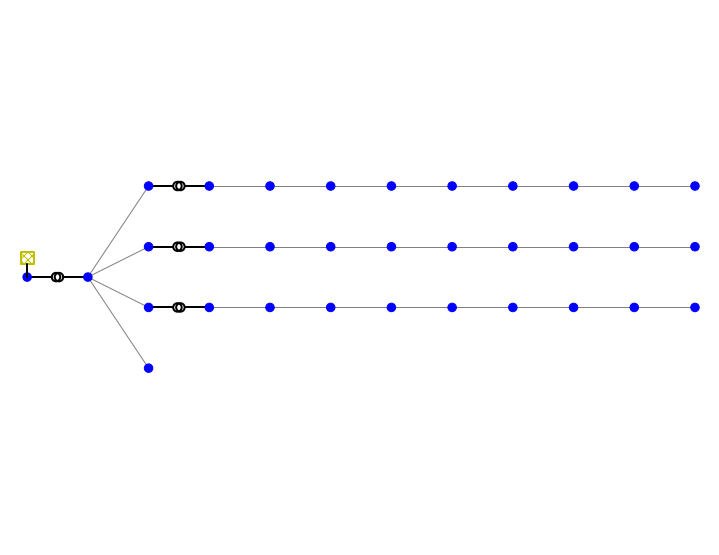

<AxesSubplot:>

In [181]:
import pandapower.plotting as plot
import pandas as pd
import numpy as np

plot.simple_plot(net, show_plot=True)

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<AxesSubplot:>

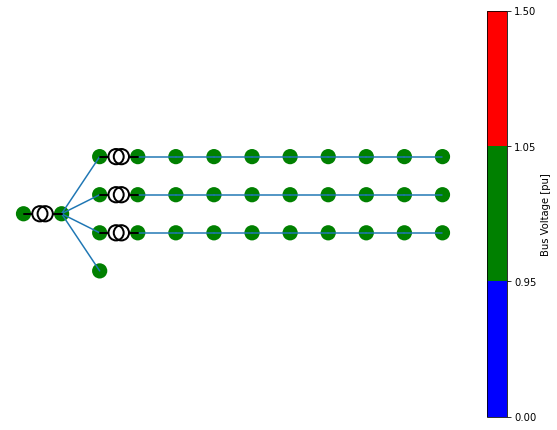

In [182]:
pp.runpp(net)

cmap_list=[((0.0,0.95), "blue"), ((0.95, 1.05), "green"), ((1.05, 1.5), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
bc = plot.create_bus_collection(net, cmap=cmap, norm=norm, size = 0.2)
lc = plot.create_line_collection(net)
tc = plot.create_trafo_collection(net)
plot.draw_collections([lc, bc, tc], figsize=(8,6))

**3) Consider that the power consumption of every household is increased to 4 kW at 0.95 power factor and solve the power flow.**

In [183]:
# 3)
#loads
# additional possibility to use create_loads, for better overview every load was created individually

# Calculation:      Power Factor = 0.95 indutive
#                   alpha = arccos(0.95) = 18.2°
#                   Q = tan(18.2) * P = 0.33 * 4kW = + 1.32kVAr (inductive)
#                   S = sqrt(P² + Q²) = sqrt((4*10^3)² + (1.32*10^3)²) = 4.212 kVA
lob42 = pp.create_load(net, bus=b42, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B42")
lob43 = pp.create_load(net, bus=b43, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B43")
lob44 = pp.create_load(net, bus=b44, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B44")
lob45 = pp.create_load(net, bus=b45, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B45")
lob46 = pp.create_load(net, bus=b46, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B46")
lob47 = pp.create_load(net, bus=b47, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B47")
lob48 = pp.create_load(net, bus=b48, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B48")
lob49 = pp.create_load(net, bus=b49, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B49")

lob52 = pp.create_load(net, bus=b52, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B52")
lob53 = pp.create_load(net, bus=b53, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B53")
lob54 = pp.create_load(net, bus=b54, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B54")
lob55 = pp.create_load(net, bus=b55, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B55")
lob56 = pp.create_load(net, bus=b56, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B56")
lob57 = pp.create_load(net, bus=b57, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B57")
lob58 = pp.create_load(net, bus=b58, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B58")
lob59 = pp.create_load(net, bus=b59, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B59")

lob62 = pp.create_load(net, bus=b62, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B62")
lob63 = pp.create_load(net, bus=b63, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B63")
lob64 = pp.create_load(net, bus=b64, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B64")
lob65 = pp.create_load(net, bus=b65, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B65")
lob66 = pp.create_load(net, bus=b66, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B66")
lob67 = pp.create_load(net, bus=b67, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B67")
lob68 = pp.create_load(net, bus=b68, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B68")
lob69 = pp.create_load(net, bus=b69, p_mw=0.004, q_mvar=0.00132, sn_mva=0.004212, name="Load B69")

# Note: Changed the type from Code to RawNBConvert because of the Task 2.2 2) and 4). 
# Unfortanately the loads aren't overwritten, they are added to the system.

In [184]:
pp.runpp(net) # Powerflow run

In [185]:
net.res_bus #show result buses

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-3.160824,1.53814
1,1.007005,-0.875269,0.000000,0.00000
2,0.996956,-1.396127,3.000000,-1.00000
3,1.006982,-0.898027,0.000000,0.00000
4,1.007009,-0.906080,0.000000,0.00000
5,1.006982,-0.898027,0.000000,0.00000
6,1.004118,-1.157302,0.000000,0.00000
7,0.989630,-1.277256,0.004000,0.00132
8,0.976896,-1.385141,0.004000,0.00132
9,0.965939,-1.479881,0.004000,0.00132


In [186]:
net.res_line #show result line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,3.039913,-1.119426,-3.000000,1.000000,0.039913,-0.119426,0.092865,0.091566,0.092865,1.007005,-0.875269,0.996956,-1.396127,36.851213
1,0.034925,-0.153637,-0.034896,-0.011497,0.000029,-0.165134,0.004517,0.001053,0.004517,1.007005,-0.875269,1.006982,-0.898027,1.792309
2,0.034942,-0.181159,-0.034896,-0.011497,0.000045,-0.192656,0.005289,0.001053,0.005289,1.007005,-0.875269,1.007009,-0.906080,2.098793
3,0.034925,-0.153637,-0.034896,-0.011497,0.000029,-0.165134,0.004517,0.001053,0.004517,1.007005,-0.875269,1.006982,-0.898027,1.792309
4,0.033485,0.011310,-0.033026,-0.011078,0.000460,0.000232,0.050805,0.050805,0.050805,1.004118,-1.157302,0.989630,-1.277256,24.192981
5,0.029026,0.009758,-0.028670,-0.009578,0.000355,0.000179,0.044662,0.044662,0.044662,0.989630,-1.277256,0.976896,-1.385141,21.267579
6,0.024670,0.008258,-0.024407,-0.008125,0.000263,0.000133,0.038438,0.038438,0.038438,0.976896,-1.385141,0.965939,-1.479881,18.304027
7,0.020407,0.006805,-0.020223,-0.006712,0.000184,0.000093,0.032144,0.032144,0.032144,0.965939,-1.479881,0.956777,-1.560492,15.306845
8,0.016223,0.005392,-0.016104,-0.005333,0.000119,0.000060,0.025790,0.025790,0.025790,0.956777,-1.560492,0.949427,-1.626101,12.280955
9,0.012104,0.004013,-0.012037,-0.003979,0.000067,0.000034,0.019386,0.019386,0.019386,0.949427,-1.626101,0.943902,-1.675980,9.231637


In [187]:
net.res_trafo #show result trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,3.160824,-1.538140,-3.144705,1.607858,0.016119,0.069718,0.018450,0.101248,1.000000,0.000000,1.007005,-0.875269,14.060831
1,0.034896,0.011497,-0.033485,-0.011310,0.001411,0.000187,0.001053,0.050805,1.006982,-0.898027,1.004118,-1.157302,9.121662
2,0.034896,0.011497,-0.033485,-0.011310,0.001411,0.000187,0.001053,0.050804,1.007009,-0.906080,1.004146,-1.165341,9.121402
3,0.034896,0.011497,-0.033485,-0.011310,0.001411,0.000187,0.001053,0.050805,1.006982,-0.898027,1.004118,-1.157302,9.121662


In [188]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,Load B42,7,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
1,Load B43,8,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
2,Load B44,9,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
3,Load B45,10,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
4,Load B46,11,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
5,Load B47,12,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
6,Load B48,13,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
7,Load B49,14,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
8,Load B52,16,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
9,Load B53,17,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye


**3.A. Are there any violations of voltage, line, or transformers?**

Bus Voltages: The pu value is in the range of 1.007pu and 0.938pu. As can be observed, with increasing line length, due to the sum of the lines in series, and the decreasing load, a collapse of the low voltage to the value of 0.938pu can be observed. This can be explained by the increasing line resistance and its capacitance. The line resistance and the increased current flow due to higher load causes a voltage drop, the line capacitance causes an increasing negative phase shift of almost -1.7°, which increases the apparent power and influences the ratio to the base apparent power. Thus, the percentage value of +-5% pu is undercut at the last 4 buses with a value of up to -6.2%. Therefore we have an violation of the voltage at the last 4 Busbars of each LV line.

Line Currents: No significant changes in the HV and MV lines, as the high voltage means that the change in power has minimal influence on the current. The LV lines now show an almost doubling of the loading percentage. This is due to the load change from 2.2kW to 4kW. (With it the appereant power) (4.2kVA/2.3kVA = 1.82) Since the voltage remains the same, the current and thus the line load increases by a factor of 1.82. This shows the influence of small load changes. The loading percentage is far away from its maximum value of 100% so there is no violation.

Transformers: Here, too, the transformers 2-4 between LV and MV are loaded by a factor of 1.82 more, since the energy required on the LV side must be made available via the transformer. Trafo 1 changed the load percentage from 13.92% to 14.06%. The loading percentage is far away from its maximum value of 100% so there is no violation.

**3.B. Create and display a colormap of the buses showing blue for all voltages below 0.95, green for voltages between 0.95 and 1.05, and red for all voltages above 1.05 pu.**

use_bus_geodata is automatically set to True, since net.line_geodata is empty.


<AxesSubplot:>

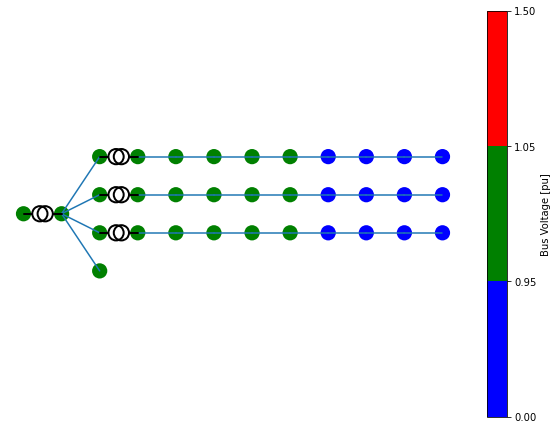

In [189]:
pp.runpp(net) # Powerflow run

cmap_list=[((0.0,0.95), "blue"), ((0.95, 1.05), "green"), ((1.05, 1.5), "red")]
cmap, norm = plot.cmap_discrete(cmap_list)
bc = plot.create_bus_collection(net, cmap=cmap, norm=norm, size = 0.2)
lc = plot.create_line_collection(net)
tc = plot.create_trafo_collection(net)
plot.draw_collections([lc, bc, tc], figsize=(8,6))

**4) If we consider that each house will purchase an electric vehicle with a 7 kW charger (in addition to their normal 2 kW with PF=0.95 load) and they want to charge at the same time.**

In [190]:
#4 adding verhicle charger
lohb42 = pp.create_load(net, bus=b42, p_mw=0.007,  name="Load Charger B42")
lohb43 = pp.create_load(net, bus=b43, p_mw=0.007,  name="Load Charger B43")
lohb44 = pp.create_load(net, bus=b44, p_mw=0.007,  name="Load Charger B44")
lohb45 = pp.create_load(net, bus=b45, p_mw=0.007,  name="Load Charger B45")
lohb46 = pp.create_load(net, bus=b46, p_mw=0.007,  name="Load Charger B46")
lohb47 = pp.create_load(net, bus=b47, p_mw=0.007,  name="Load Charger B47")
lohb48 = pp.create_load(net, bus=b48, p_mw=0.007,  name="Load Charger B48")
lohb49 = pp.create_load(net, bus=b49, p_mw=0.007,  name="Load Charger B49")

lohb52 = pp.create_load(net, bus=b52, p_mw=0.007,  name="Load Charger B52")
lohb53 = pp.create_load(net, bus=b53, p_mw=0.007,  name="Load Charger B53")
lohb54 = pp.create_load(net, bus=b54, p_mw=0.007,  name="Load Charger B54")
lohb55 = pp.create_load(net, bus=b55, p_mw=0.007,  name="Load Charger B55")
lohb56 = pp.create_load(net, bus=b56, p_mw=0.007,  name="Load Charger B56")
lohb57 = pp.create_load(net, bus=b57, p_mw=0.007,  name="Load Charger B57")
lohb58 = pp.create_load(net, bus=b58, p_mw=0.007,  name="Load Charger B58")
lohb59 = pp.create_load(net, bus=b59, p_mw=0.007,  name="Load Charger B59")

lohb62 = pp.create_load(net, bus=b62, p_mw=0.007,  name="Load Charger B62")
lohb63 = pp.create_load(net, bus=b63, p_mw=0.007,  name="Load Charger B63")
lohb64 = pp.create_load(net, bus=b64, p_mw=0.007,  name="Load Charger B64")
lohb65 = pp.create_load(net, bus=b65, p_mw=0.007,  name="Load Charger B65")
lohb66 = pp.create_load(net, bus=b66, p_mw=0.007,  name="Load Charger B66")
lohb67 = pp.create_load(net, bus=b67, p_mw=0.007,  name="Load Charger B67")
lohb68 = pp.create_load(net, bus=b68, p_mw=0.007,  name="Load Charger B68")
lohb69 = pp.create_load(net, bus=b69, p_mw=0.007,  name="Load Charger B69")

# Note: Changed the type from Code to RawNBConvert because of the Task 3. 

In [191]:
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,Load B42,7,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
1,Load B43,8,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
2,Load B44,9,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
3,Load B45,10,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
4,Load B46,11,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
5,Load B47,12,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
6,Load B48,13,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
7,Load B49,14,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
8,Load B52,16,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye
9,Load B53,17,0.004,0.00132,0.0,0.0,0.004212,1.0,True,wye


In [192]:
pp.runpp(net) # Powerflow run

In [193]:
net.res_bus #show result buses

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-3.364378,1.510385
1,1.006853,-0.930717,0.000000,0.000000
2,0.996804,-1.451728,3.000000,-1.000000
3,1.006500,-0.959161,0.000000,0.000000
4,1.006473,-0.968159,0.000000,0.000000
5,1.006500,-0.959161,0.000000,0.000000
6,1.000296,-1.766858,0.000000,0.000000
7,0.959736,-2.517700,0.011000,0.001320
8,0.923846,-3.229051,0.011000,0.001320
9,0.892776,-3.884510,0.011000,0.001320


In [194]:
net.res_line #show result line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,3.039925,-1.119380,-3.000000,1.000000,0.039925,-0.119380,0.092879,0.091580,0.092879,1.006853,-0.930717,0.996804,-1.451728,36.856692
1,0.102703,-0.146393,-0.102636,-0.018620,0.000068,-0.165014,0.005127,0.002992,0.005127,1.006853,-0.930717,1.006500,-0.959161,2.034581
2,0.102726,-0.173885,-0.102637,-0.018621,0.000090,-0.192506,0.005790,0.002992,0.005790,1.006853,-0.930717,1.006473,-0.968159,2.297804
3,0.102703,-0.146393,-0.102636,-0.018620,0.000068,-0.165014,0.005127,0.002992,0.005127,1.006853,-0.930717,1.006500,-0.959161,2.034581
4,0.100899,0.017075,-0.097014,-0.015113,0.003885,0.001962,0.147662,0.147662,0.147662,1.000296,-1.766858,0.959736,-2.517700,70.315133
5,0.086014,0.013793,-0.082956,-0.012248,0.003058,0.001545,0.131011,0.131011,0.131011,0.959736,-2.517700,0.923846,-3.229051,62.386409
6,0.071956,0.010928,-0.069652,-0.009765,0.002304,0.001164,0.113710,0.113710,0.113710,0.923846,-3.229051,0.892776,-3.884510,54.147442
7,0.058652,0.008445,-0.057017,-0.007619,0.001635,0.000826,0.095802,0.095802,0.095802,0.892776,-3.884510,0.866662,-4.466762,45.620112
8,0.046017,0.006299,-0.044951,-0.005760,0.001066,0.000538,0.077353,0.077353,0.077353,0.866662,-4.466762,0.845621,-4.958537,36.834758
9,0.033951,0.004440,-0.033342,-0.004133,0.000609,0.000307,0.058443,0.058443,0.058443,0.845621,-4.958537,0.829753,-5.343772,27.830191


In [195]:
net.res_trafo #show result trafo

,p_hv_mw,q_hv_mvar,p_lv_mw,q_lv_mvar,pl_mw,ql_mvar,i_hv_ka,i_lv_ka,vm_hv_pu,va_hv_degree,vm_lv_pu,va_lv_degree,loading_percent
0,3.364378,-1.510385,-3.348058,1.586052,0.016320,0.075667,0.019356,0.106218,1.000000,0.000000,1.006853,-0.930717,14.751435
1,0.102636,0.018620,-0.100899,-0.017075,0.001737,0.001545,0.002992,0.147662,1.006500,-0.959161,1.000296,-1.766858,25.909317
2,0.102637,0.018621,-0.100900,-0.017076,0.001737,0.001545,0.002992,0.147667,1.006473,-0.968159,1.000268,-1.775908,25.910293
3,0.102636,0.018620,-0.100899,-0.017075,0.001737,0.001545,0.002992,0.147662,1.006500,-0.959161,1.000296,-1.766858,25.909317


**4.A. Is the system able to withstand this load?**

Bus Voltages: The pu value is in the range of 1.007pu and 0.8556pu. As can be observed, with increasing line length, due to the sum of the lines in series, and the decreasing load, a collapse of the low voltage to the value of 0.8556pu can be observed. This can be explained by the increasing line resistance and its capacitance. The line resistance and the increased current flow due to higher load causes a voltage drop, the line capacitance causes an increasing phase shift to almost -5°, which increases the apparent power and influences the ratio to the base apparent power. Thus, the percentage value of +-5% pu is undercut at the last 6 buses with a value of up to -14.44%.

Line Currents: No significant changes in the HV and MV lines, as the high voltage means that the change in power has minimal influence on the current. The LV lines now show an almost 4.36 times higher loading percentage. This is due to the load change from 2.2kW to 9.2kW. (with it the appearent power) (9.2kVA/2.3kVA = 4, Here it can be seen that without taking into account the line capacitance and the resulting phase shift, a deviation of the factors occurs. This results in an increased reactive current, which influences the current.) Since the voltage remains the same, the current and thus the line load increases by a factor of 4.36. The maximum load percentage here is 56.55%. The loading percentage is little bigger than its half of the maximum value of 100% so there is still no violation.

Transformers: Trafo 1 load changes from 13.92% to 14.583%, the remaining Trafos are still equally loaded and the percentage have changed  from 5.04% to 20.9%. The loading percentage is far away from its maximum value of 100% so there is still no violation.


**4.B. If no, propose some solutions to alleviate the problem.**

Bus Voltages: Additional parallel transformers to relief the power conversion. (Current reduction) Less Distance between the Buses. Ring, Meshed Networks with feed from other sides. This will generate high costs. In addition, reduce the loads.

Line: Not necessary, but if the loading percentage would be to high you can choose a higher diameter of install parallel lines. (current reduction) But this comes with high costs.

Transformers: Not necessary, but if the loading percentage would be to high you can install a parallel transformer or change the grid system into a Ring or Meshed Network. This will generate high costs.

**Conclusion:**

The System have no problems to withstand this load.  However, large voltage deviations can be seen with increasing load and distance of the feeders. These voltage deviations exceed the maximum prescribed +-5% by far. One case even showed almost -15%. As can be seen, the jump due to the additional load of 7kW to the previous 2,2kW per bus is greater for the line load of an additional ~+43,5% and transformer load of an additional ~+15.9% compared to the previous task 1.A. Care must be taken here that additional load additions do not become too large, as first the transformers and then the lines can be overloaded. In this task, we still have enough reserve for full capacity of 100%. However, this should not be aimed at exactly due to unexpected switching on of additional loads and a certain percentage reserve should be available.


If necessary the network should be changed to a meshed of ring grid. If the transformer or line is nearly overloaded you can 
install parallel transformers or lines to relief the components. 

## 3 Short circuit analysis

**3.1 Tasks**

**1) Compute the maximum three-phase short-circuit currents for a solid fault (ZF=0 Ω).**

In [196]:
import pandapower.shortcircuit as sc
pp.runpp(net) # Powerflow run
sc.calc_sc(net, fault="3ph", case="max", ip=True, ith=True, r_fault_ohm=0, x_fault_ohm=0, branch_results=True, return_all_currents=False)

Branch results are in beta mode and might not always be reliable, especially for transformers


**1.A. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each bus.**

In [197]:
net.res_bus_sc

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.587848,100.000000,1.100741,0.590740,43.969642,125.627547
1,2.391179,70.832867,4.770408,2.407425,1.517492,6.023599
2,2.072143,59.781143,3.578809,2.079945,3.082492,6.683599
3,1.950672,57.783918,3.324490,1.957491,3.395492,6.815599
4,1.886066,55.870123,3.163606,1.892239,3.708492,6.947599
5,1.950672,57.783918,3.324490,1.957491,3.395492,6.815599
6,10.917028,6.467809,21.444482,10.986104,0.007113,0.026265
7,3.410214,2.020386,5.021827,3.415835,0.066503,0.056265
8,1.946556,1.153240,2.828877,1.949389,0.125893,0.086265
9,1.358094,0.804605,1.966985,1.359996,0.185283,0.116265


**1.B. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each line.**

In [198]:
net.res_line_sc

,ikss_ka,ip_ka,ith_ka
0,1.725733,3.088911,1.732230
1,1.950672,3.324490,1.957491
2,1.886066,3.163606,1.892239
3,1.950672,3.324490,1.957491
4,3.410214,5.021827,3.415835
5,1.946556,2.828877,1.949389
6,1.358094,1.966985,1.359996
7,1.042138,1.507181,1.043572
8,0.845248,1.221470,0.846399
9,0.710859,1.026763,0.711821


**1.C. What is the difference between the three values of current computed at each node or line?**

ikss (Initial symmetrical short-circuit current) - This current is created out of the Sum of the Short Circuit Contribution IkI of all voltage source elements and Short Circuit Contribution IkII or all current source elements. (Ik = IkI + IkII)So the resulst is Ik = IkI + IkII. The voltages sources are replaced by equivalent voltage sources VQ. A distinction is made between a 2-phase and 3-phase short school shot. In addition, a voltage correction factor c is included depending on the voltage level of the busbar. The calculation is executed with the Admitance- and Impedancematrix of the Grid. In this case all operational currents at all bussed and currenct source elements are neglected. In addition the voltage at the fault bus is equal to the calculated equivalent voltage source VQ. (Formulas for this can be found at https://pandapower.readthedocs.io/en/v2.4.0/shortcircuit/ikss.html) (RMS Value) The effective value of the symmetrical
short-circuit current at the moment at which the short circuit arises, when the short-circuit impedance has its value from the time zero. (Source: Short Circuits in Power Systems - A practical Guide to IEC 60909-0)


ip (short-circuit current peak) - This value describes the current amplitude when a short circuit occurs. It is formed from the factor sqrt(2) with the initial symmetrical short-circuit currents (Ik = IkI + IkII) and a peak factor k. This peak factor k describes an exponentially decaying behaviour depending on the R/X ratio. This is equivalent to the short-circuit impedance Zk at the fault location. In addition, a distinction is made between a radial and a meshed network. A meshed network has, for example, several feeders at bus bars or consumers, which changes the impedance and thus the short-circuit current. In addition, the short-circuit current is distributed among them, whereas in a radial network it only flows from one direction. The peak factor in a short-circuit location is limited to a maximum value depending on the voltage level. (Formulas for this can be found at https://pandapower.readthedocs.io/en/v2.4.0/shortcircuit/ip.html) (Amplitude) The largest possible momentary value of the short circuit occurring. (Source: Short Circuits in Power Systems - A practical Guide to IEC 60909-0)


ith (equivalent thermal short-circuit current) - The thermal current is composed of the dc and ac parts of the thermal load. These are referred to as correction factors m and n. These are dependent on the peak factor k and the short-circuit time Tk. (Formulas for this can be found at https://pandapower.readthedocs.io/en/v2.4.0/shortcircuit/ith.html) (RMS)
Unfortunately, I cannot find any further information on this. I assume that on the basis of the values a statement can be made about the thermal load of the conductors or similar. For example, a suitable selection of the protective device or cables can be made.


**1.D. Which standard is used to compute the short-circuit currents? Briefly explain the methodology based on the documentation, the slides of the course, and material you find online.**


The IEC 60909-0 standard is used. This takes into account the overtemperatures caused by overcurrents, breakdowns due to overvoltages or arcing due to impure humid air. This is to prevent interruptions of the power supply, destruction of the components and thermal / mechanical stress on the equipment. For this purpose, different short-circuit current calculations are carried out, such as initial symmetrical short-circuit current or peak short-circuit current. Various methods are used for this. 

- Superposition method, which can be solved linearly with a known power flow by a nodal admittance matrix system. 
- Equivalent voltage source, here all voltage sources are short-circuited. The voltage sources and transformers are represented by their impedance and the short-circuit location is indicated as the voltage source. Passive loads, conductor capacities, transformer step settings, generator excitations are neglected.
- Calculation with reference values consisting of the voltage, the current, the impedance and the apparent power. It can be decided whether the Ohm system (kV,kA,V, MVA), the per-unit system (pu - where the reference is 100MVA) or the %/MVA system is used. The last two systems always refer to the ratio between the actual value and the reference value.

When calculating the current amplitude, the short-circuit system is converted into a system with a differential component. Here, the voltage source is short-circuited and accordingly only the resistive and inductive components in the system are taken into account. This allows a differential equation to be set up, which can be converted into an exponential function by calculation. This then describes a time-dependent, decaying DC voltage superimposed with a sine wave. 


**2) Deactivate the contribution of the large motor and re-compute the maximum threephase short-circuit currents for a solid fault (ZF=0 Ω).**

In [199]:
net.sgen.in_service = False
pp.runpp(net) # Powerflow run
sc.calc_sc(net, fault="3ph", case="max", ip=True, ith=True, r_fault_ohm=0, x_fault_ohm=0, branch_results=True, return_all_currents=False)

Branch results are in beta mode and might not always be reliable, especially for transformers


**2.A. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each bus.**

In [200]:
net.res_bus_sc

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.524864,100.000000,1.011668,0.527447,43.969642,125.627547
1,2.044769,70.832867,4.280510,2.058661,1.517492,6.023599
2,1.725733,59.781143,3.088911,1.732230,3.082492,6.683599
3,1.668078,57.783918,2.924842,1.673910,3.395492,6.815599
4,1.612832,55.870123,2.777194,1.618110,3.708492,6.947599
5,1.668078,57.783918,2.924842,1.673910,3.395492,6.815599
6,9.335478,6.467809,19.207832,9.394547,0.007113,0.026265
7,2.916176,2.020386,4.323152,2.920983,0.066503,0.056265
8,1.664558,1.153240,2.430072,1.666981,0.125893,0.086265
9,1.161347,0.804605,1.688742,1.162973,0.185283,0.116265


**2.B. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each line.**

In [201]:
net.res_line_sc

,ikss_ka,ip_ka,ith_ka
0,1.725733,3.088911,1.732230
1,1.668078,2.924842,1.673910
2,1.612832,2.777194,1.618110
3,1.668078,2.924842,1.673910
4,2.916176,4.323152,2.920983
5,1.664558,2.430072,1.666981
6,1.161347,1.688742,1.162973
7,0.891163,1.293671,0.892389
8,0.722797,1.048298,0.723782
9,0.607877,0.881124,0.608700


**2.C. Compare to the values of Task 1 and explain the difference.**

At each Bus:   The ikss (Initial symmetrical short-circuit current) drops at each bus. It can be seen that the voltage level has a great influence on the short-circuit current. The short-circuit current increases more with lower voltage than with higher voltage.  (400V -> -0.5kA (e.g. Bus 62-69) & -1.59kA (Bus 61) / 20kV -> -0.34kA (Bus Index 5) / 110kV -> -0.063kA (Bus Index 0)) In addition, it can be seen that as the line impedance increases, the short-circuit current decreases proportionally due to the loads connected in series. The ip (short-circuit current peak) and ith (equivalent thermal short-circuit current) depend on the ikss, which also influences them. The highest current occurs on the bars 41,51,61 due to the very low impedance of the lines. The short circuit currents at the busbar 1 and the line 1 doesnt change because is we have a fault at the busbar 1 the generator is not taken into account. This also counts for the line 1. This is why there is no change. If we calculate the short circuit currents at the other lines or busses the generator will be taken into account, which has an influence on the grip impedance and its short circuit currents.


At each Line: The line 1, which is connected between the busbar 2 and 3 (line between bars of generator and 20kV Grid) the current stays the same. At the 20kV-Buses the current drops by -0.3kA at each bus. The 400V-Busses the current drops from -0.5kA to -0.08kA. The highest shortcut currents occur at the lines between the Busbars 41,51,61 and 42,52,62 due to the very low impedance directly after the transformers because of the missing line impedances. By the following lines the impedance is rising and the short circuit currents are getting lower and lower.


**3) Compute the maximum three-phase short-circuit currents with fault impedance ZF=1+j1.5 Ω.**

In [202]:
pp.runpp(net) # Powerflow run
sc.calc_sc(net, fault="3ph", case="max", ip=True, ith=True, r_fault_ohm=1, x_fault_ohm=1.5, branch_results=True, return_all_currents=False)

Branch results are in beta mode and might not always be reliable, especially for transformers


**3.A. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each bus.**

In [203]:
net.sgen.in_service = True
net.res_bus_sc

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.518064,98.704543,1.000390,0.520631,44.969642,127.127547
1,1.600998,55.460188,3.333988,1.611640,2.517492,7.523599
2,1.388865,48.111706,2.598556,1.394997,4.082492,8.183599
3,1.350409,46.779523,2.485218,1.356026,4.395492,8.315599
4,1.313356,45.495973,2.380546,1.318528,4.708492,8.447599
5,1.350409,46.779523,2.485218,1.356026,4.395492,8.315599
6,0.138923,0.096249,0.286901,0.139815,1.007113,1.526265
7,0.134649,0.093288,0.274747,0.135473,1.066503,1.556265
8,0.130594,0.090478,0.263421,0.131358,1.125893,1.586265
9,0.126745,0.087811,0.252853,0.127455,1.185283,1.616265


**3.B. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each line.**

In [204]:
net.res_line_sc

,ikss_ka,ip_ka,ith_ka
0,1.388865,2.598556,1.394997
1,1.350409,2.485218,1.356026
2,1.313356,2.380546,1.318528
3,1.350409,2.485218,1.356026
4,0.134649,0.274747,0.135473
5,0.130594,0.263421,0.131358
6,0.126745,0.252853,0.127455
7,0.123089,0.242981,0.123751
8,0.119614,0.233748,0.120234
9,0.116310,0.225102,0.116891


**3.C. Compare to the values of Task 1 and explain the difference.**

At each Bus: Due to the additional impedance in case of short circuit, it can be seen that all short circuit currents show enormous differences to Task 1. This is especially noticeable in the 400V level, where the ikss (Initial symmetrical short-circuit current) was significantly reduced from 3.4kA at the bus index 16 to 0.135kA and from 10.88kA at bus 15 to 0.139kA. In addition, ip (short-circuit current peak) was reduced in the 400V level, where the short-circuit current was significantly reduced from 5.01kA at the bus index 16 to 0.27kA and from 21.3kA at bus index 15 to 0.286kA. ith (equivalent thermal short-circuit current) is also reduced significantly. As can be seen, the impedance (rk_ohm, xk_ohm) is added to each short circuit location in the calculation. Accordingly, the current is reduced due to the increasing impedance. In addition, the apparent power is reduced in the event of a short circuit.

At each Line: The ikss (initial symmetrical short-circuit current) at Line Index 27 was also reduced from 0.539kA to 0.11A. The 400V lines directly after the transformers are reducing by a lot. Here we can see a drop from 3.4kA to 0.1345kA (Line 20) The ip (short-circuit current peak) is reduced from 5kA to 0.263kA. The ith (equivalent thermal short-circuit current) is reduced from 3.4kA to 0.135kA. This greatly reduces the loading during the shortcut on the line. A short-circuit current reduction can also be seen in line index 0, there we can see that the ikss is changing from 1.72kA to 1.388kA, the ip from 3.09kA to 2.59kA and the ith from 1.73kA to 1.39kA.  Also for the 20kV lines the current drops from 1.95kA to 1.35kA (e.g. Line 2)



Conclusion: Even with a low impedance value, the short-circuit current can be reduced enormously in any voltage level. At This has the advantage of protecting a cable from thermal destruction and mechanical forces.

**4) Compute the maximum two-phase short-circuit currents for a solid fault (ZF=0 Ω).**

In [205]:
sc.calc_sc(net, fault="2ph", case="max", ip=True, ith=True, r_fault_ohm=0, x_fault_ohm=0, branch_results=True, return_all_currents=False)

Branch results are in beta mode and might not always be reliable, especially for transformers


**4.A. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each bus.**

In [206]:
net.res_bus_sc

,ikss_ka,skss_mw,ip_ka,ith_ka,rk_ohm,xk_ohm
0,0.517529,28.867513,0.965203,0.520076,43.969642,125.627547
1,2.117232,20.447687,4.196928,2.131617,1.517492,6.023599
2,1.840939,17.257330,3.164973,1.847870,3.082492,6.683599
3,1.727192,16.680780,2.932635,1.733230,3.395492,6.815599
4,1.669988,16.128315,2.791533,1.675453,3.708492,6.947599
5,1.727192,16.680780,2.932635,1.733230,3.395492,6.815599
6,9.666311,1.867096,18.871120,9.727473,0.007113,0.026265
7,3.019521,0.583235,4.442634,3.024498,0.066503,0.056265
8,1.723547,0.332912,2.503309,1.726056,0.125893,0.086265
9,1.202503,0.232269,1.740736,1.204187,0.185283,0.116265


**4.B. Present the initial symmetrical short-circuit current, the short-circuit current peak, and the equivalent thermal short-circuit current at each line.**

In [207]:
net.res_line_sc

,ikss_ka,ip_ka,ith_ka
0,1.494529,2.675075,1.500155
1,1.727192,2.932635,1.733230
2,1.669988,2.791533,1.675453
3,1.727192,2.932635,1.733230
4,3.019521,4.442634,3.024498
5,1.723547,2.503309,1.726056
6,1.202503,1.740736,1.204187
7,0.922744,1.333862,0.924014
8,0.748411,1.081025,0.749431
9,0.629419,0.908715,0.630271


**4.C. Compare to the values of Task 1 and explain the difference.**

At each Bus: The ikss (symmetrical initial short-circuit current), ip (short-circuit current peak) and ith (equivalent thermal short-circuit current) are all smaller by a factor of ~1.13 in relation to task 1. 

At each Line: We can see that the values for the LV-Side are here as well smaller by a factor of ~1.13, except the MV here we have a factor of ~1.15. This is due to the different correction factors c for different voltage levels.

This corresponds approximately to the value of 2/sqrt(3). This is caused by the sqrt(3) (chaining factor). With the 2-phase short-circuit, the value 2 arises from the shifting of the centre point between the 2 voltage peaks of the voltage arrows of the phases. This results in half the voltage (1/2) between the chained voltage (sqrt(3)). It must be remembered that this factor is derived from the reciprocal of the fraction. In the case of the MV factor this can be applied, therefore the correction factor is 1.

In addition, deviations can be generated by the different correction factors C for different voltage levels.

This shows that depending on the short-circuit case (3-Ph, 2-Ph, Phase to Ground) a smaller/larger short-circuit current flows. Accordingly, the components are subjected to different thermal and mechanical stresses. Switching from 3-phase to 2-phase short-circuits reduces the current and relieves the load on cables, busbars, connections, etc. in the event of a short-circuit.